In [9]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("hotel_bookings.csv")



In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


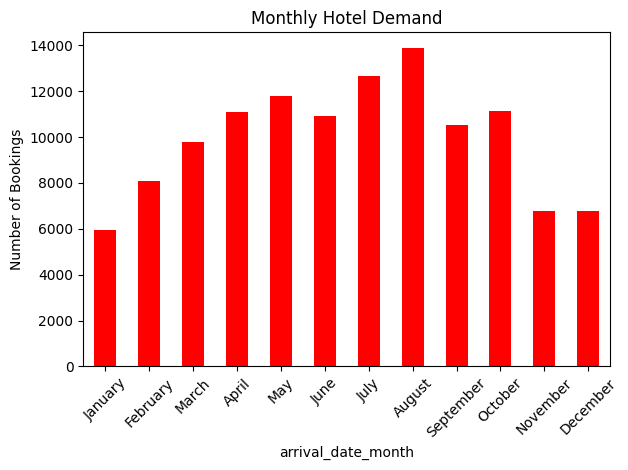

Most bookings: August
Least bookings: January


In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("hotel_bookings.csv")
monthly = df['arrival_date_month'].value_counts()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
monthly = monthly.reindex(months)


monthly.plot(kind='bar', title = 'Monthly Hotel Demand', color = 'red')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Most bookings:',monthly.idxmax())
print('Least bookings:',monthly.idxmin())

In [12]:
df = df[df['customer_type'].isin(['Transient', 'Transient-Party', 'corporate'])]    

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights'] 

df['traveler_type'] = df['customer_type'].apply(lambda x: 'corporate' if x == 'corporate' else 'leisure')

summary = df.groupby('traveler_type')[['lead_time', 'total_nights', 'adr']].mean().round(1)
print(summary)

               lead_time  total_nights    adr
traveler_type                                
leisure            102.9           3.4  102.4


In [13]:
cancel_rate = df.groupby('deposit_type')['is_canceled'].mean().round(2)

adr_stability = df[df['is_canceled'] == 0].groupby('deposit_type')['adr'].mean().round(2)

summary = pd.DataFrame({
    'Cancellation Rate %': (cancel_rate * 100).round(1),
    'Avg ADR (Revenue)': adr_stability
})

print('impact of deposit policy on cancellation rate and revenue stability')
print(summary)

impact of deposit policy on cancellation rate and revenue stability
              Cancellation Rate %  Avg ADR (Revenue)
deposit_type                                        
No Deposit                   29.0             100.53
Non Refund                   99.0              77.58
Refundable                   22.0              68.49


Correlation between lead time and cancellation rate:0.29


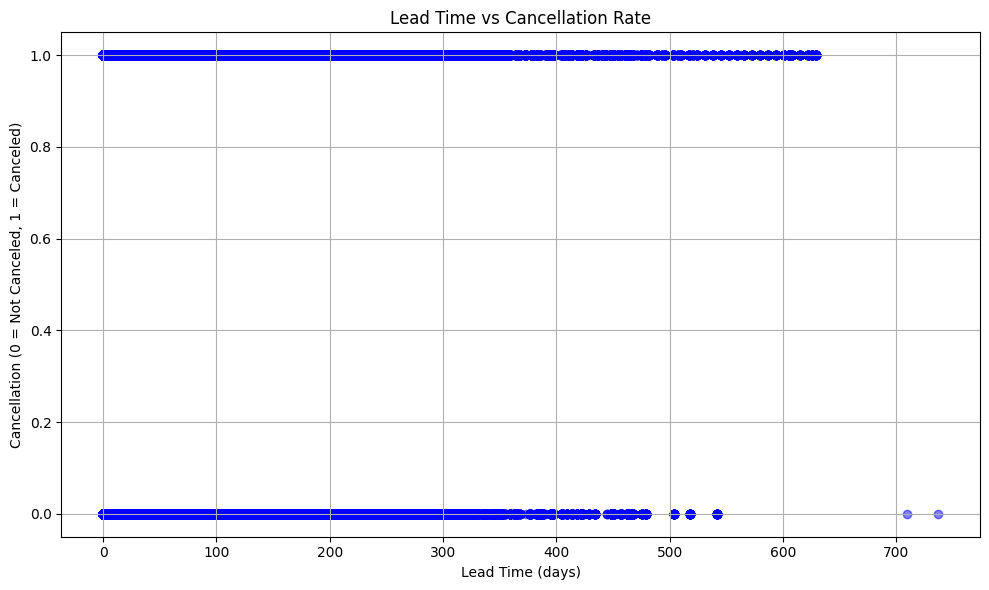

In [14]:
correlation = df['lead_time'].corr(df['is_canceled'])
print(f'Correlation between lead time and cancellation rate:{correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(df['lead_time'], df['is_canceled'], alpha=0.5, color='blue')
plt.title('Lead Time vs Cancellation Rate')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation (0 = Not Canceled, 1 = Canceled)')
plt.grid(True)
plt.tight_layout()
plt.show()